## Preprocessing Data

Tahapan :
1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming
5. Visualization

In [3]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ai_Gp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#import data
data_linkedin = pd.read_csv('data scraping linkedin.csv')
data_linkedin.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,46c71918-0504-4dce-899d-1592cc9a88df,Rhea Lolliola,https://play-lh.googleusercontent.com/a-/ALV-U...,Terbaik,5,0,NaN,2024-10-24 21:41:33,NaN,NaN,NaN
1,2723ac5e-2275-4e00-af1e-eb3d6a13e0b6,Hamdani Arta,https://play-lh.googleusercontent.com/a-/ALV-U...,"Pelajaran buat kalian, jangan reset HP jika be...",1,0,4.1.995,2024-10-24 20:31:15,NaN,NaN,4.1.995
2,a1b48885-cb55-4569-894d-1452bc0a3eb6,Vahmi Putri,https://play-lh.googleusercontent.com/a-/ALV-U...,Yang terbaik,5,0,NaN,2024-10-24 06:50:36,NaN,NaN,NaN
3,080166c7-41a8-4656-94df-34af892ef23c,gawink didin,https://play-lh.googleusercontent.com/a/ACg8oc...,Keren,5,0,4.1.958.1,2024-10-24 01:00:01,NaN,NaN,4.1.958.1
4,38ce5f6f-66c1-43f1-a62f-a7c88a2a6218,Mochammad Farid,https://play-lh.googleusercontent.com/a/ACg8oc...,"Very use full to find job in around the world,...",5,0,NaN,2024-10-23 21:39:53,NaN,NaN,NaN


In [18]:
data_linkedin2 = data_linkedin.copy()

### Labeling Data Based on Reviews

In [19]:
label = []
for index, row in data_linkedin.iterrows():
    if row['score'] == 1 or row['score'] == 2:
        label.append('negatif')
    elif row['score'] == 3:
        label.append('netral')
    else:
        label.append('positif')

data_linkedin2['label'] = label

In [20]:
data_linkedin2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,label
0,46c71918-0504-4dce-899d-1592cc9a88df,Rhea Lolliola,https://play-lh.googleusercontent.com/a-/ALV-U...,terbaik,5,0,NaN,2024-10-24 21:41:33,NaN,NaN,NaN,positif
1,2723ac5e-2275-4e00-af1e-eb3d6a13e0b6,Hamdani Arta,https://play-lh.googleusercontent.com/a-/ALV-U...,"pelajaran buat kalian, jangan reset hp jika be...",1,0,4.1.995,2024-10-24 20:31:15,NaN,NaN,4.1.995,negatif
2,a1b48885-cb55-4569-894d-1452bc0a3eb6,Vahmi Putri,https://play-lh.googleusercontent.com/a-/ALV-U...,yang terbaik,5,0,NaN,2024-10-24 06:50:36,NaN,NaN,NaN,positif
3,080166c7-41a8-4656-94df-34af892ef23c,gawink didin,https://play-lh.googleusercontent.com/a/ACg8oc...,keren,5,0,4.1.958.1,2024-10-24 01:00:01,NaN,NaN,4.1.958.1,positif
4,38ce5f6f-66c1-43f1-a62f-a7c88a2a6218,Mochammad Farid,https://play-lh.googleusercontent.com/a/ACg8oc...,"very use full to find job in around the world,...",5,0,NaN,2024-10-23 21:39:53,NaN,NaN,NaN,positif


### Case Folding

In [21]:
# Converting text to lowercase
data_linkedin2['content'] = data_linkedin2['content'].str.lower()

In [22]:
data_linkedin2.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,label
0,46c71918-0504-4dce-899d-1592cc9a88df,Rhea Lolliola,https://play-lh.googleusercontent.com/a-/ALV-U...,terbaik,5,0,NaN,2024-10-24 21:41:33,NaN,NaN,NaN,positif
1,2723ac5e-2275-4e00-af1e-eb3d6a13e0b6,Hamdani Arta,https://play-lh.googleusercontent.com/a-/ALV-U...,"pelajaran buat kalian, jangan reset hp jika be...",1,0,4.1.995,2024-10-24 20:31:15,NaN,NaN,4.1.995,negatif
2,a1b48885-cb55-4569-894d-1452bc0a3eb6,Vahmi Putri,https://play-lh.googleusercontent.com/a-/ALV-U...,yang terbaik,5,0,NaN,2024-10-24 06:50:36,NaN,NaN,NaN,positif
3,080166c7-41a8-4656-94df-34af892ef23c,gawink didin,https://play-lh.googleusercontent.com/a/ACg8oc...,keren,5,0,4.1.958.1,2024-10-24 01:00:01,NaN,NaN,4.1.958.1,positif
4,38ce5f6f-66c1-43f1-a62f-a7c88a2a6218,Mochammad Farid,https://play-lh.googleusercontent.com/a/ACg8oc...,"very use full to find job in around the world,...",5,0,NaN,2024-10-23 21:39:53,NaN,NaN,NaN,positif


### Tokenizing

In [71]:
# Break down each word
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data_linkedin2['tokenized'] = data_linkedin2['content'].apply(word_tokenize_wrapper)
print("tokenizing result: ")
print(data_linkedin2['tokenized'].head())

tokenizing result: 
0                                            [terbaik]
1    [pelajaran, buat, kalian, ,, jangan, reset, hp...
2                                      [yang, terbaik]
3                                              [keren]
4    [very, use, full, to, find, job, in, around, t...
Name: tokenized, dtype: object


### Filtering

In [72]:
# Stopword Removal
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ai_Gp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [73]:
# Get stopword
list_stopwords = stopwords.words('indonesian')

# Additional stopword
list_stopwords.extend(['yg', 'dgn', 'dr', 'di', 'dari', 'ke', 'gw', 'gue', 'jadi', 'nya', 'apk', 'sih', 'yang',
                       'dan', 'atau', 'juga', 'utk', 'untuk', 'aja', 'karena', 'tetapi', 'ini', 'gua', 'saya',
                       'ya', 'yah', 'aku', 'nih', 'tuh', 'klo', 'kalo', 'kalau'])
list_stopwords = set(list_stopwords)

# Remove stopword in the list tokenizing
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data_linkedin2['without_stopwords'] = data_linkedin2['tokenized'].apply(stopwords_removal)
print(data_linkedin2['without_stopwords'].head())

0                                            [terbaik]
1    [pelajaran, ,, reset, hp, logout, linkedin, ,,...
2                                            [terbaik]
3                                              [keren]
4    [very, use, full, to, find, job, in, around, t...
Name: without_stopwords, dtype: object


### Stemming

In [74]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    var = []
    for x in content:
        st = stemmer.stem(x)
        var.append(st)
    data_clean = []
    data_clean = " ".join(var)
    print(data_clean)
    return data_clean

stemming_result = data_linkedin2['without_stopwords'].apply(stemming)

stemming_result.to_csv('data bersih.csv', index=False)
data_clean = pd.read_csv('data bersih.csv', encoding='latin1')
data_clean.head()

baik
ajar  reset hp logout linkedin  susah loginnya 
baik
keren
very use full to find job in around the world  thanks linkedin
langgar akun batas udah verivikasi  tolong guna dipermudahaplikadi udah bagus mohon guna mudah
kode qr kembali
info loker bos   
bantu
bagus
linkedin oke
koin
baik
tarik untung program  menginstal aplikasi hp 
good and easy share
linkedin error tanggal 22 oktober 2024
someone hack my account but i even could not enter my account or report it  please you make an active email to report from outside if i could not get into persona verification  why i have to uploaad my id  you know indonesia very loose for the robe data
mandi 1 2 3 4 la 5 terima 6 7 buruk 8 hancur 9 udah 10 tau orang 11 bukti orang 12 kirim saldo 100 13 terima kasih 14 mahju pantang mundur
mantap
good
coba moga sukses tambah bintang
mantap
verifikasi gambar error  login credential sesuai
it is very informatif and strike to the points 
well
amazing
alam mudah cari kerja
bagus
good job to the work
g

,without_stopwords
0,baik
1,ajar reset hp logout linkedin susah loginnya
2,baik
3,keren
4,very use full to find job in around the world ...


### Menggabungkan kolom content dan label reviews

In [75]:
data_1 = data_clean
data_2 = data_linkedin2
data_3 = data_2['label']

result = pd.concat([data_1, data_3], axis=1)

In [76]:
result.head()

,without_stopwords,label
0,baik,positif
1,ajar reset hp logout linkedin susah loginnya,negatif
2,baik,positif
3,keren,positif
4,very use full to find job in around the world ...,positif


### Visualization

In [95]:
sent_neg = result[result['label'] == 'negatif']
sent_neg.head()

,without_stopwords,label
1,ajar reset hp logout linkedin susah loginnya,negatif
5,langgar akun batas udah verivikasi tolong gun...,negatif
15,linkedin error tanggal 22 oktober 2024,negatif
16,someone hack my account but i even could not e...,negatif
22,verifikasi gambar error login credential sesuai,negatif


In [79]:
from wordcloud import WordCloud

In [80]:
import matplotlib.pyplot as plt

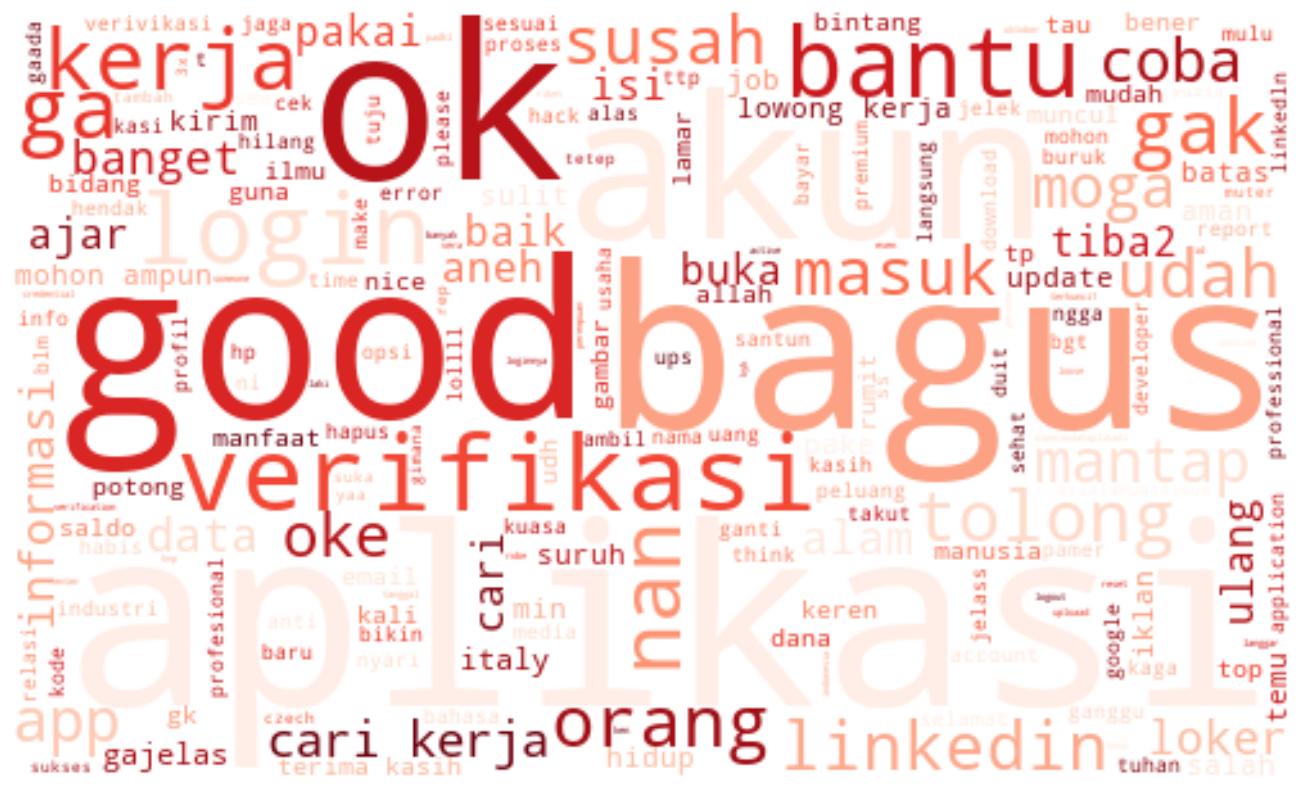

In [93]:
all_text_negatif = ' '.join(str(word) for word in sent_neg['without_stopwords'])
# Create a WordCloud object
wordcloud = WordCloud(colormap='Reds', width=500, height=300, mode='RGBA', background_color='white')

# Generate the word cloud
wordcloud.generate(all_text_negatif)

# Display the generated image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
sent_pos = result[result['label'] == 'positif']
sent_pos.head()

,without_stopwords,label
0,baik,positif
2,baik,positif
3,keren,positif
4,very use full to find job in around the world ...,positif
6,kode qr kembali,positif


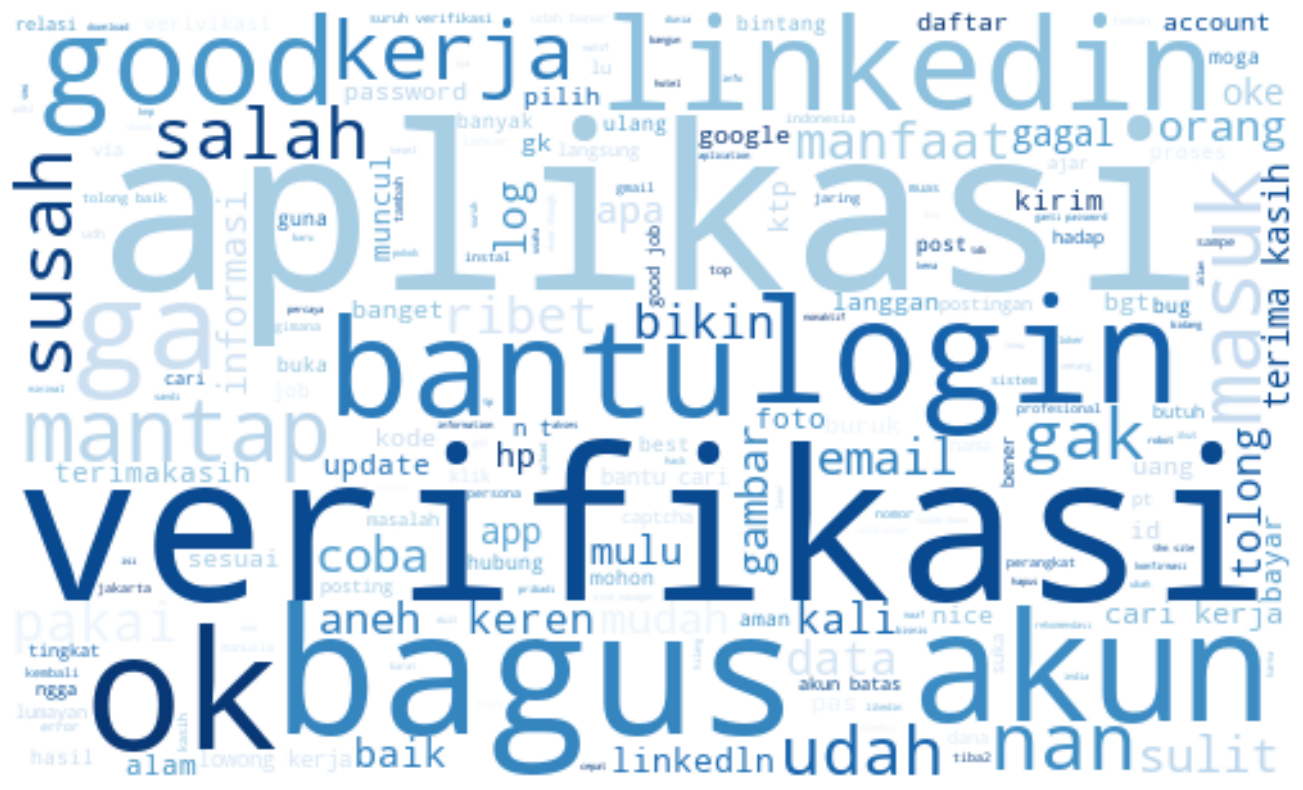

In [96]:
all_text_positif = ' '.join(str(word) for word in sent_pos['without_stopwords'])
# Create a WordCloud object
wordcloud = WordCloud(colormap='Blues', width=500, height=300, mode='RGBA', background_color='white')

# Generate the word cloud
wordcloud.generate(all_text_positif)

# Display the generated image
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

C:\Users\Ai_Gp\AppData\Local\Temp\ipykernel_16164\4034749603.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentiment = pd.value_counts(data_linkedin2['label'], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

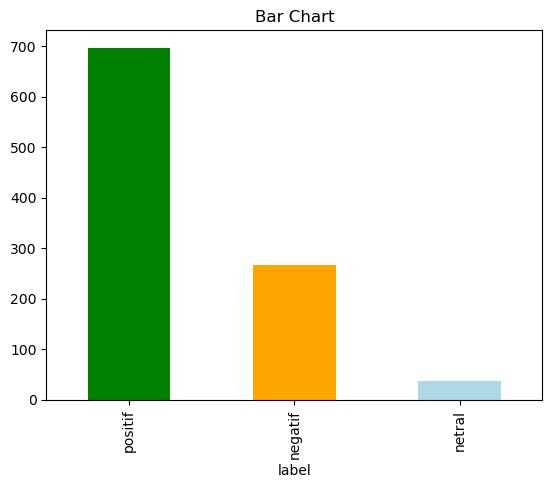

In [65]:
# Sentiment results based on reviews
sentiment = pd.value_counts(data_linkedin2['label'], sort=True)
sentiment.plot(kind='bar', color=['green', 'orange', 'lightblue'])
plt.title("Bar Chart")
plt.show